In [0]:
import numpy as np
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import random
from sklearn.model_selection import train_test_split

In [0]:
X = np.load('X.npy')
y = np.load('y.npy')

In [7]:
print(X.shape, y.shape)

(7227, 60, 80, 3) (7227,)


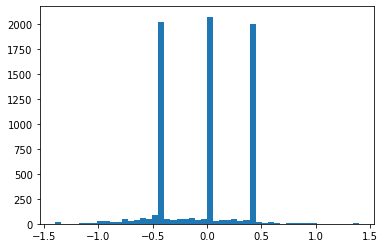

In [8]:
plt.hist(y, 50);

0.0


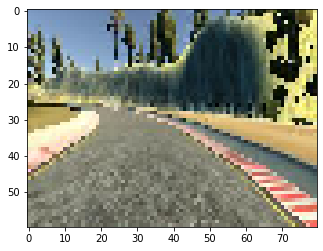

0.225


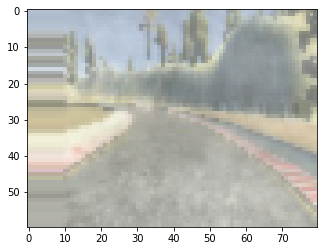

In [28]:
#  A function that modifies the image given on the input
def augment(img, steering_angle):
  #  Flip
  if random.random() > 0.5:   #  Generating numbers between 0 and 1
    img = img[:, ::-1, :]     #  Mirror image
    steering_angle = -steering_angle  #  Changing the angle to negative when the image is inverted
  #  Blur
  blurer = iaa.GaussianBlur(iap.Uniform(0.1, 1.0))
  img = blurer.augment_image(img)
  #  Shuffle - Random color change between RGB channels
  sh = iaa.ChannelShuffle(p=0.5)   #  50% random probability
  img = sh.augment_image(img)
  #  Fog - weather conditions
  fog = iaa.Fog()
  img = fog.augment_image(img)
  #  Translate
  tx = random.randint(-20,20)
  translater = iaa.Affine(translate_px={"x":tx}, mode='edge')
  img = translater.augment_image(img)
  steering_angle += tx*0.025  #  image shift 
  return img, steering_angle

plt.imshow(X[0])  #  First image from the collection
print(y[0])
plt.show();

#  First image and first angle
img, angle = augment(X[0], y[0])
plt.imshow(img)
print(angle)
plt.show();

In [0]:
#  Division of the data set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2020)

In [32]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(5781, 60, 80, 3) (5781,)
(1446, 60, 80, 3) (1446,)


In [37]:
#  Generate image examples
Xgen=[]
ygen=[]

for i in range(X_train.shape[0]):
  img, angle = augment(X[i], y[i])
  #  Adding data to tables
  Xgen.append(img)
  ygen.append(angle)

#  Converting data to matrix
Xgen = np.array(Xgen)
ygen = np.array(ygen)

print(Xgen.shape, ygen.shape)

(5781, 60, 80, 3) (5781,)


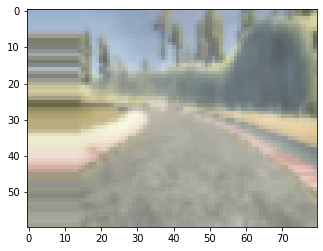

In [34]:
plt.imshow(Xgen[0]);

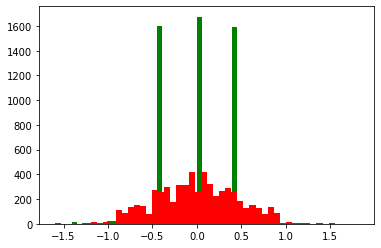

In [39]:
plt.hist(y_train, 50, facecolor='green');
plt.hist(ygen, 50, facecolor='red');

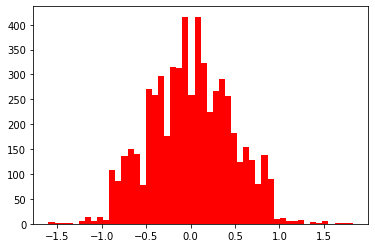

In [40]:
plt.hist(ygen, 50, facecolor='red');